# Example with a truncated NFW profile

## Import

In [1]:
import pygtfcode as gtf

## Instantiate config object

In [2]:
config = gtf.Config()

This holds all of the parameters that are used to instantiate a State object.  These can be modified before instantiating the State.  Once the State object exists, the config object becomes an attribute of the state.

In [3]:
config

Config(
  io=IOParams(model_no='<not evaluated>', model_dir='<not evaluated>', base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/examples', nlog=100000, drho_prof=0.1, drho_tevol=0.01, overwrite=True, chatter=True),
  grid=GridParams(rmin=0.01, rmax=200.0, ngrid=200),
  init=NFWParams(Mvir=3000000000.0, cvir=20.0, z=0.0),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=1e-12, eps_dt=0.001, eps_du=0.0001, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_v2=10)
)

Change to a truncated NFW profile, modify some parameters.

In general, precision parameters are very finicky, and depending on the initial profile, the simulation may fail depending on what you choose.  For the trucated NFW, `eps_du = 1e-4` and `eps_du = 1e-3` have worked for certain choices of the cutoff energy.

In [4]:
config.init = "truncated_NFW"

config

Config(
  io=IOParams(model_no='<not evaluated>', model_dir='<not evaluated>', base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/examples', nlog=100000, drho_prof=0.1, drho_tevol=0.01, overwrite=True, chatter=True),
  grid=GridParams(rmin=0.01, rmax=200.0, ngrid=200),
  init=TruncatedNFWParams(Mvir=3000000000.0, cvir=20.0, z=0.0, Zt=0.05938, deltaP=1e-05),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=1e-12, eps_dt=0.001, eps_du=0.0001, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_v2=10)
)

The model number is automatically set upon instatiating the state by inspecting the working directory and looking for the next available model number.  This can be overridden by specifying the model_no parameter.  If a simulation has already been run with that model number, files will be overwritten upon instantiation of the state.

In [5]:
config.io.model_no = 0

# Instantiate the state

This can be constructed from the config object, or a previous experiment can be loaded with `State.from_dir()`

In [6]:
state = gtf.State.from_config(config)

Computing characteristic parameters for simulation...
Generating lookup for rho(phi)...
Computing potential profile for truncated NFW halo...
Integrating Poisson equation outward: r = 116.793421, phi = -0.000002
Setting up radial grid...
Initializing profiles...
Computing Menc: r = 115.625, m = 2.658
Generating lookup for v2 integrand...
Computing v2: r = 112.970, v2 = 0.000
State initialized.
Directory already exists: /Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/examples/Model000
Model information written to model_metadata.txt
Initial profiles written to disk.


Plot the current state (initial state):

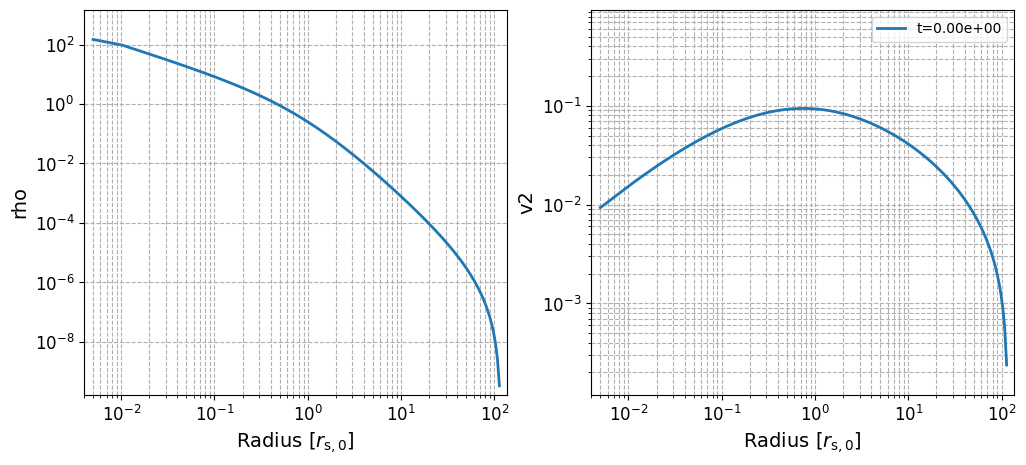

In [7]:
gtf.plot_snapshots(state, grid=True, profiles=['rho', 'v2'])

# Run simulation

By default, the system evolves until one of three stop conditions occur:
- central density exceeds 1500
- time exceeds 1000
- central density becomes a nan

Additional conditions can be added with keyword arguments into `run()`: `steps`, `stoptime`, `rho_c`


In [8]:
state.run()

Initial profiles written to disk.
Time evolution file initialized.
Log file initialized:
      step          time          <dt>         rho_c         v_max        Kn_min  <dt lim>  <dr lim>  <du lim>  <n_iter_v2>  <n_iter_dr>
         0  0.000000e+00           N/A  1.480969e+02  3.066874e-01  1.091955e+01       N/A       N/A       N/A          N/A          N/A
    100000  5.033403e+00  5.033403e-05  4.216706e+00  3.052256e-01  2.348740e+01  9.99e-02  2.82e-04  9.18e-01  0.00000e+00  2.00001e+00
    200000  1.287927e+01  7.845864e-05  3.094842e+00  3.021608e-01  2.625486e+01  7.81e-02  2.85e-04  7.74e-01  0.00000e+00  2.00000e+00
    300000  2.379780e+01  1.091853e-04  2.699657e+00  2.997891e-01  2.761491e+01  9.11e-02  2.85e-04  6.30e-01  0.00000e+00  2.00000e+00
    400000  3.947233e+01  1.567453e-04  2.536386e+00  2.985581e-01  2.818869e+01  1.20e-01  2.86e-04  5.66e-01  0.00000e+00  2.00000e+00
    500000  5.510663e+01  1.563431e-04  2.514355e+00  2.989083e-01  2.814724e+01  1.17e-0

# Inspect/present results

These can be optionally saved using the `filename` keyword

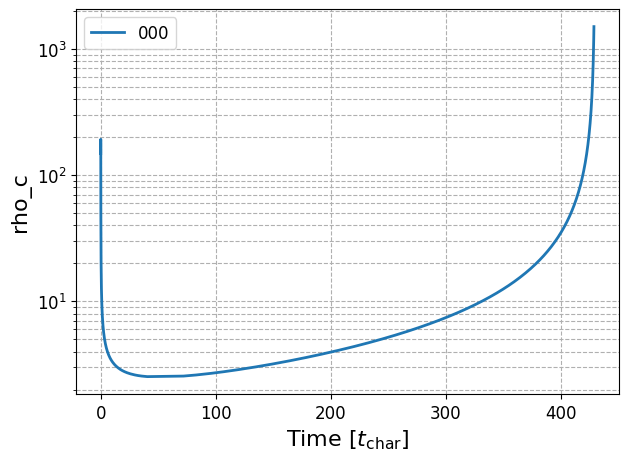

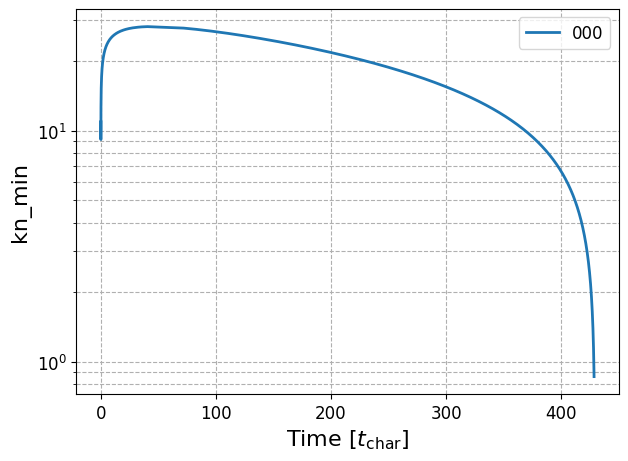

In [14]:
state.plot_time_evolution(grid=True)
state.plot_time_evolution(grid=True, quantity='kn_min')

When plotting snapshots, the index `-1` corresponds to the last snapshot.

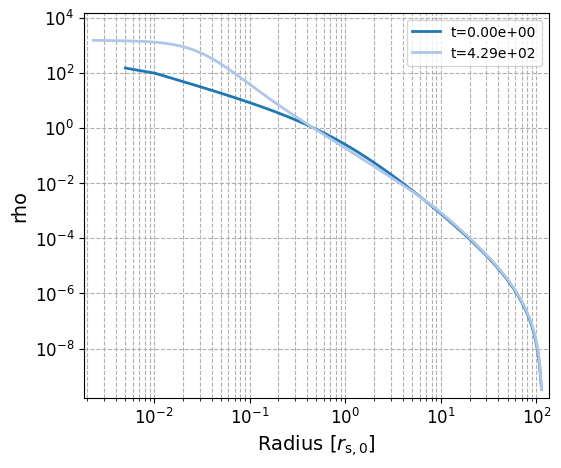

In [ ]:
state.plot_snapshots(grid=True, snapshots=[0,-1])

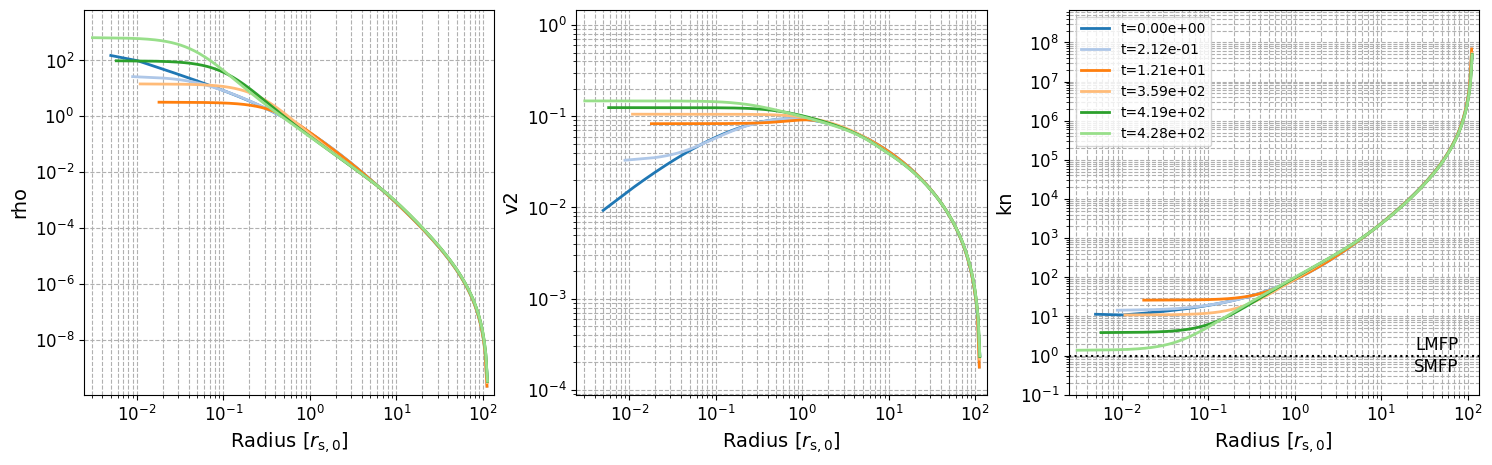

In [20]:
snapshots = list(range(0, 101, 20))

state.plot_snapshots(grid=True, snapshots=snapshots, profiles=['rho', 'v2', 'kn'])

# Animate the evolution

In [21]:
state.make_movie(grid=True, profiles=['rho', 'v2', 'kn'])

Generating 110 frames...


Frames: 100%|██████████| 110/110 [01:00<00:00,  1.80frame/s]


Compiling into a movie using ffmpeg...
Deleting frames...
Movie saved to /Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/examples/Model000/movie_rho_v2_kn.mp4
